# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [50]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [6]:
from scipy.stats import pearsonr

In [111]:
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
corr, p_value = pearsonr(Direct_Bilirubin, Total_Bilirubin)
print(corr)

0.8746179301164135


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

Text(0, 0.5, 'Total_Bilirubin')

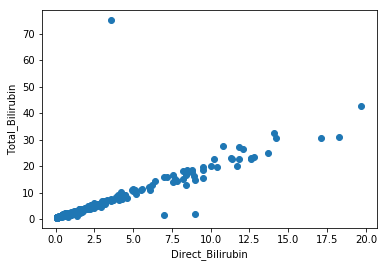

In [112]:
plt.scatter(Direct_Bilirubin, Total_Bilirubin)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')

Стоит удалить выброс с Total_Bilirubin > 70

Text(0, 0.5, 'Total_Bilirubin')

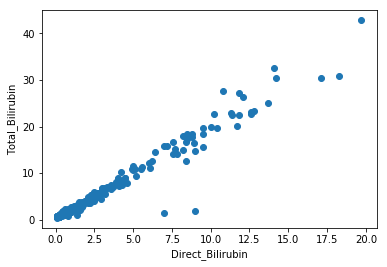

In [114]:
data = data[ data['Total_Bilirubin'] < 70]
Direct_Bilirubin = data_['Direct_Bilirubin']
Total_Bilirubin = data_['Total_Bilirubin']
plt.scatter(Direct_Bilirubin, Total_Bilirubin)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')

In [115]:
direct_bilirubin = np.array(Direct_Bilirubin).reshape(-1,1)
total_bilirubin = np.array(Total_Bilirubin).reshape(-1,1)

In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [117]:
from sklearn.model_selection import train_test_split

# x = direct_bilirubin,
# y = total_bilirubin
X_train, X_test, y_train, y_test = train_test_split(
    direct_bilirubin,
    total_bilirubin,
    test_size = 0.2
)

In [118]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
predicted_y = model.predict(X_test)

In [120]:
model.score(X_test, y_test)

0.9848041249851012

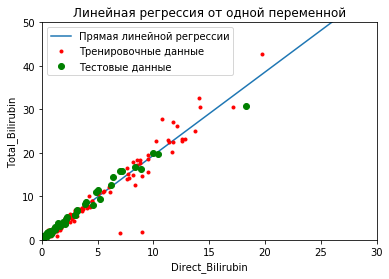

In [121]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,30)
plt.ylim(0,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [34]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

NameError: name 'age' is not defined

Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [122]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.00,18.00,19.0,5.1,2.0,0.544,1.0
0.25,33.0,0.8,0.2,175.25,23.00,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.00,35.00,42.0,6.6,3.1,0.940,1.0
0.75,58.0,2.6,1.3,298.00,60.75,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [123]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.728522,3.175601,1.482474,290.505155,80.783505,109.986254,6.483677,3.142955,0.947664,1.286942
std,16.198165,5.455335,2.809543,243.140884,182.769631,289.161313,1.086322,0.795757,0.319542,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,42.800000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

In [124]:
data_.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.25,23.00,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.00,35.00,42.0,6.6,3.1,0.94,1.0
0.75,58.0,2.6,1.3,298.00,60.75,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [125]:
import statistics

In [126]:
less50 = data[ data['Age'] < 50]['Dataset']
more50 = data[ data['Age'] >= 50]['Dataset']
print(len(less50), len(more50))
print('Квартиль 0.5 для людей меньше 50:', np.quantile(less50, .50),', среднее: ', statistics.mean(less50)) 
print('Квартиль 0.5 для людей больше 50:', np.quantile(more50, .50),', среднее: ', statistics.mean(more50))

353 229
Квартиль 0.5 для людей меньше 50: 1.0 , среднее:  1.3172804532577904
Квартиль 0.5 для людей больше 50: 1.0 , среднее:  1.240174672489083


Наличие или отсутствие болезни является категориальной переменной, среднее значение здесь не имеет значения для практического использования, а квартиль вполне способен отражать действительность

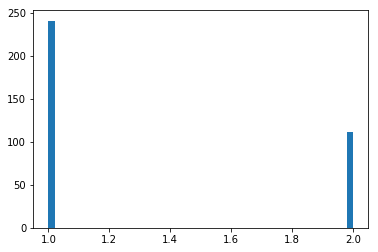

In [127]:
plt.hist(less50, 50)
plt.show()

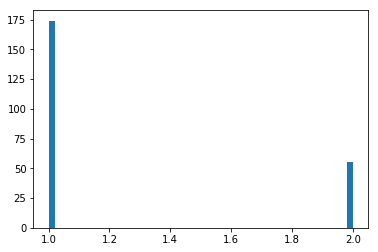

In [128]:
plt.hist(more50, 50)
plt.show()

Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных (выборки полученной) - 1) 

In [129]:
ill = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(ill, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.6680227101132354, pvalue=0.00792947118580456)

In [130]:
print('Количество больных всего: ', len(ill))

Количество больных всего:  415


Чисо степеней свободы 415-1 = 414

Сравнивая с таблицей ниже, получим t-value больше табличного для данной доверительной вероятности, следовательно мы отвергаем нулевую гипотезу о том, что средние значения у выборок больных и всех людей равны

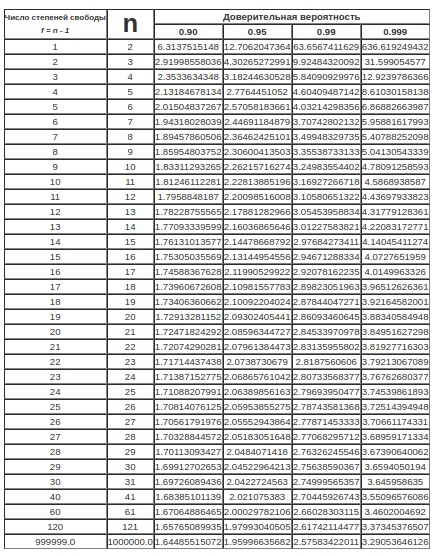

In [1]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [134]:
ill = data[data['Dataset']==1]['Total_Bilirubin']

healthy = data[data['Dataset']==2]['Total_Bilirubin']

stats.ttest_ind(ill, healthy)

Ttest_indResult(statistic=5.8649857449009275, pvalue=7.548849823227222e-09)

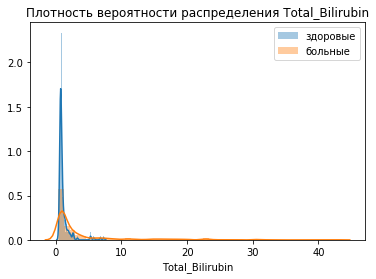

In [135]:
sns.distplot(healthy, 50)
sns.distplot(ill, 50)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['здоровые', 'больные'])
plt.show()

Группы являются статистически значимыми, т.к. t-value велико

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [138]:
young = data[data['Age']<30]['Dataset']

middle = data[ (data['Age']>=30)&(data['Age']<55) ]['Dataset']

old = data[ data['Age']>=55]['Dataset']

stats.f_oneway(young, middle, old)

F_onewayResult(statistic=9.315460426330212, pvalue=0.00010424938736321011)

p-value много меньше 0.05, следовательно возрастные группы статистически значимы, поскольку вероятность заболевания печени зависит от возраста человека

Вопросы задавать на почту yustiks@gmail.com